# Исследование набора данных о видеоиграх. Объемы продаж.

In [17]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
games = pd.read_csv('games.csv')

In [19]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Размерность таблицы
games.shape

(16598, 11)

In [7]:
# Типы данных
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# Количество пропущенных значений
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# Удаление строк с пропущенными значениями из датасета
games = games.dropna()

In [12]:
# Проверка количества пропущенных значений
games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Типы переменных:

Rank (место) - Ранговая/порядковая

Name (название), Platform (платформа), Genre (жанр), Publisher (издатель) - Номинативные

Year (год) - Дискретная

NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales (объемы продаж) - Непрерывные

In [14]:
# Описательные характеристики года релиза
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Данные представлены с 1980 по 2020 года. Медианное значение - 2007 год.

In [15]:
# Мода
scipy.stats.mode(games.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

# Наибольшее число игр было выпущено в 2009 году.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


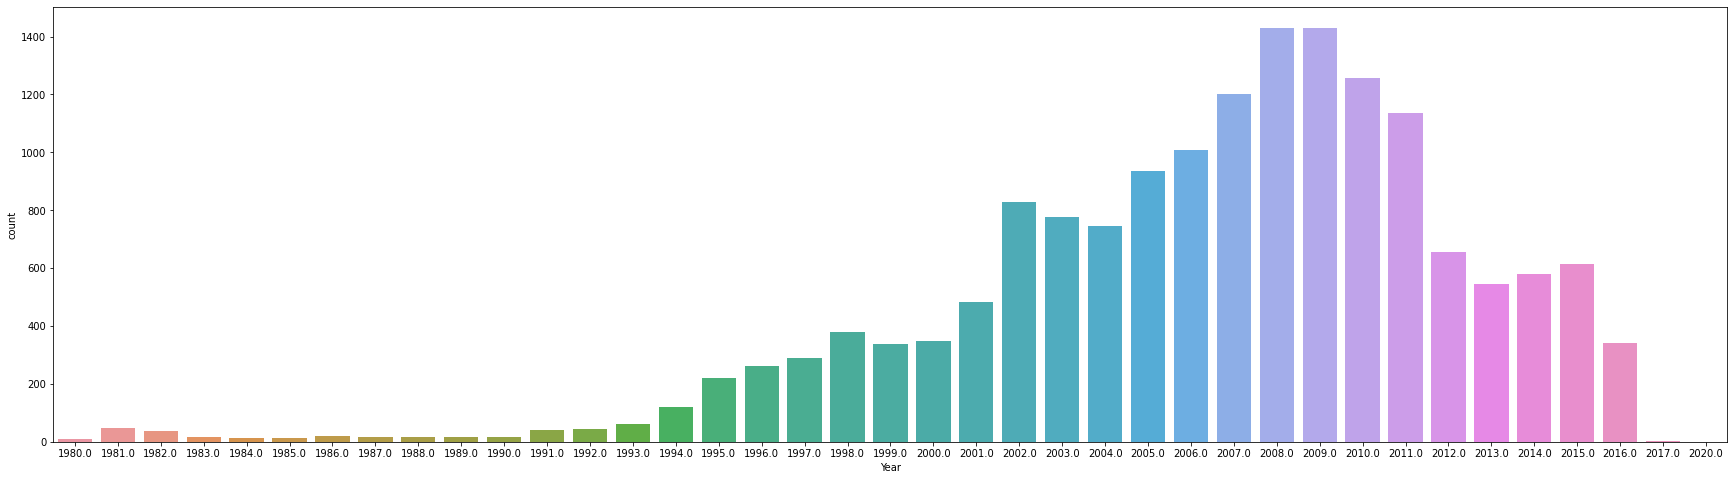

In [10]:
# График распределения количества выпущенных игр по годам
plt.figure(figsize=(30, 8))
sns.countplot(games.Year)

# Платформы с наибольшим числом релизов (более 10%)

C:\Users\hatec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='count'>

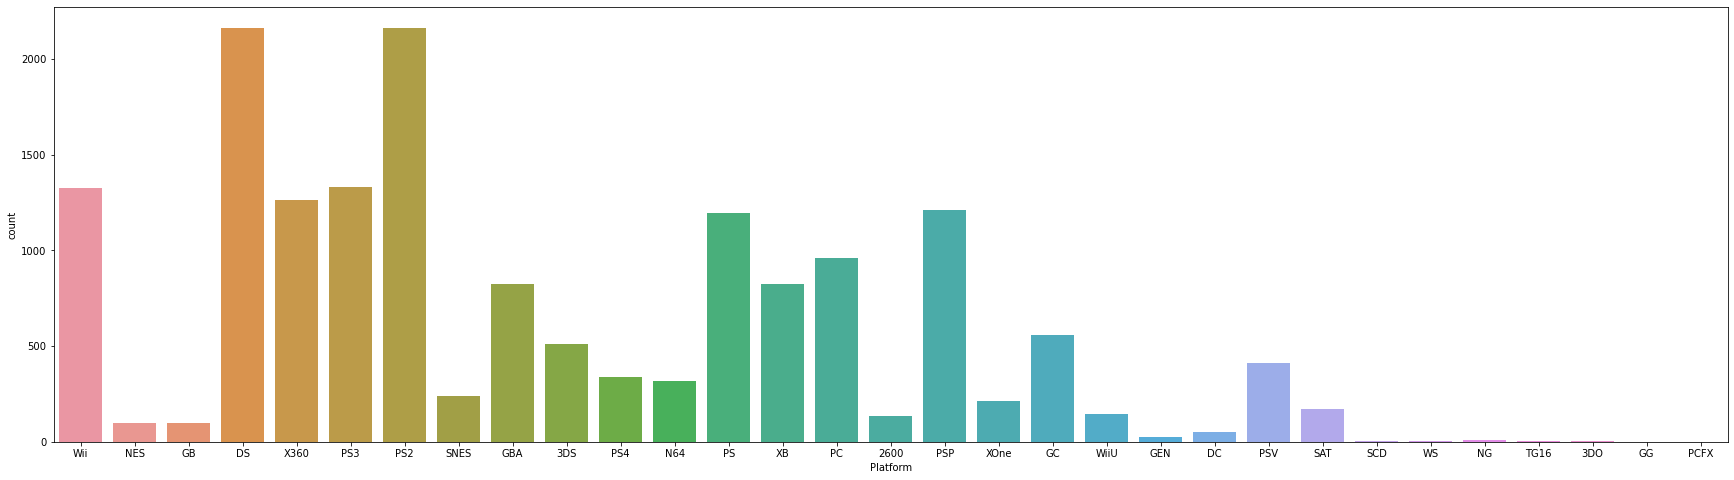

In [20]:
# Распределение всех платформ
plt.figure(figsize=(30, 8))
sns.countplot(games.Platform)

In [25]:
# Количество выпущенных видеоигр по платформам
count_platform = games.groupby('Platform', as_index=False) \
    .agg({'Name': 'count'}) \
    .sort_values('Name', ascending=False) \
    .rename(columns={'Name': 'count_games'})

count_platform.head()

,Platform,count_games
4,DS,2163
16,PS2,2161
17,PS3,1329
26,Wii,1325
28,X360,1265


In [26]:
# Процент от общего числа данных в датасете
count_platform['precent'] = round(count_platform.count_games / count_platform.count_games.sum() * 100, 2)

In [28]:
count_platform.head()

,Platform,count_games,precent
4,DS,2163,13.03
16,PS2,2161,13.02
17,PS3,1329,8.01
26,Wii,1325,7.98
28,X360,1265,7.62


In [29]:
count_platform_more_10 = count_platform.query('precent > 10').sort_values('precent', ascending = False)

In [30]:
count_platform_more_10

,Platform,count_games,precent
4,DS,2163,13.03
16,PS2,2161,13.02


In [46]:
print('Платформы с релизом более 10%:', ', '.join(count_platform_more_10.Platform))

Платформы с релизом более 10%: DS, PS2


In [96]:
# Топ-10 издателей
games.Publisher.value_counts().head(10)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

# Анализ продаж игр от Nintendo

In [49]:
# Сформирую датасет с нужным издателем
nintendo_games = games.query('Publisher == "Nintendo"')
nintendo_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [50]:
# Нахожу описательные характеристики для продаж во всех регионах (среднее, медиану, стандартное отклонение)
nintendo_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.161977,0.595647,0.647824,0.135605
median,0.370000,0.120000,0.280000,0.030000
std,2.976782,1.736095,1.059476,0.462002


По всем показателям лидером продаж являются страны Северной Америки.

# Наиболее популярные жанры от Nintendo в Северной Америке. 

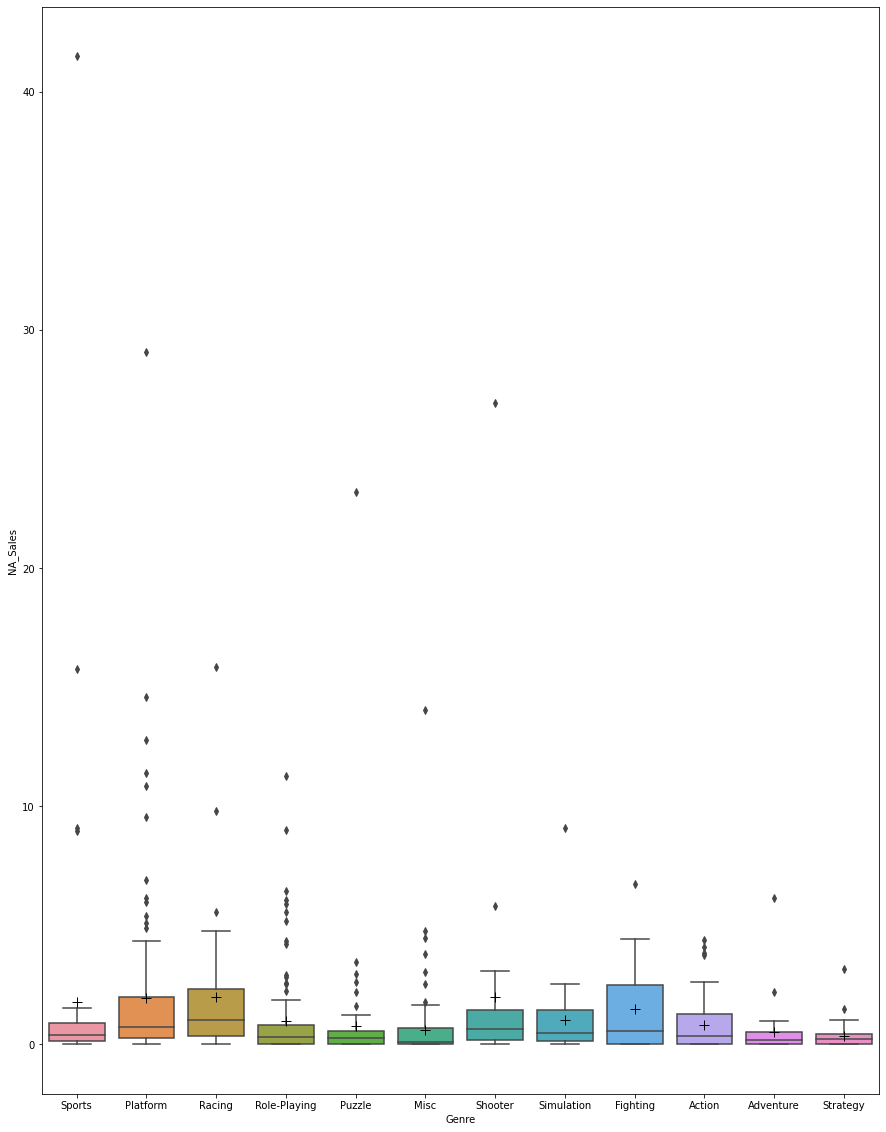

In [89]:
plt.figure(figsize=(15,20))
sns.boxplot(x=nintendo_games.Genre, 
            y=nintendo_games.NA_Sales, 
            data=nintendo_games, 
            showmeans=True, 
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

Наибольший межквартильный размах наблюдается у игр жанра Fighting. 

Наибольшее медианное значение продаж игр жанров Rasing и Platform.

Наибольший выброс наблюдается у жанра Sports.

# Топ-5 жанров в мировых продажах от Nintendo.

In [82]:
nintendo_global = nintendo_games.groupby('Genre', as_index = False) \
    .sum('Global_Sales') \
    .rename(columns={'Global_Sales': 'Sum_Sales'}) \
    .sort_values('Sum_Sales', ascending = False) \
    .head(5)

nintendo_global_top5 = nintendo_global[['Genre', 'Sum_Sales']]

print('Топ-5 жанров в мировых продажах от Nintendo:', ', '.join(nintendo_global_top5.Genre))

Топ-5 жанров в мировых продажах от Nintendo: Platform, Role-Playing, Sports, Misc, Racing


# Динамика изменений объема мировых продаж для топ-5 жанров: Platform, Role-Playing, Sports, Misc, Racing

In [90]:
# Выборка жанров по миру
nintendo_top5 = nintendo_games.query("Genre in ['Platform', 'Role-Playing', 'Sports', 'Misc', 'Racing']")

In [91]:
# Продажи игр по жанрам и годам
nintendo_top5.groupby(['Genre', 'Year'], as_index = False).agg({'Global_Sales': 'sum'})

,Genre,Year,Global_Sales
0,Misc,1983.0,2.14
1,Misc,1984.0,1.45
2,Misc,1989.0,1.28
3,Misc,1992.0,4.94
4,Misc,1995.0,0.30
...,...,...,...
121,Sports,2010.0,2.18
122,Sports,2012.0,1.05
123,Sports,2013.0,1.69
124,Sports,2014.0,0.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

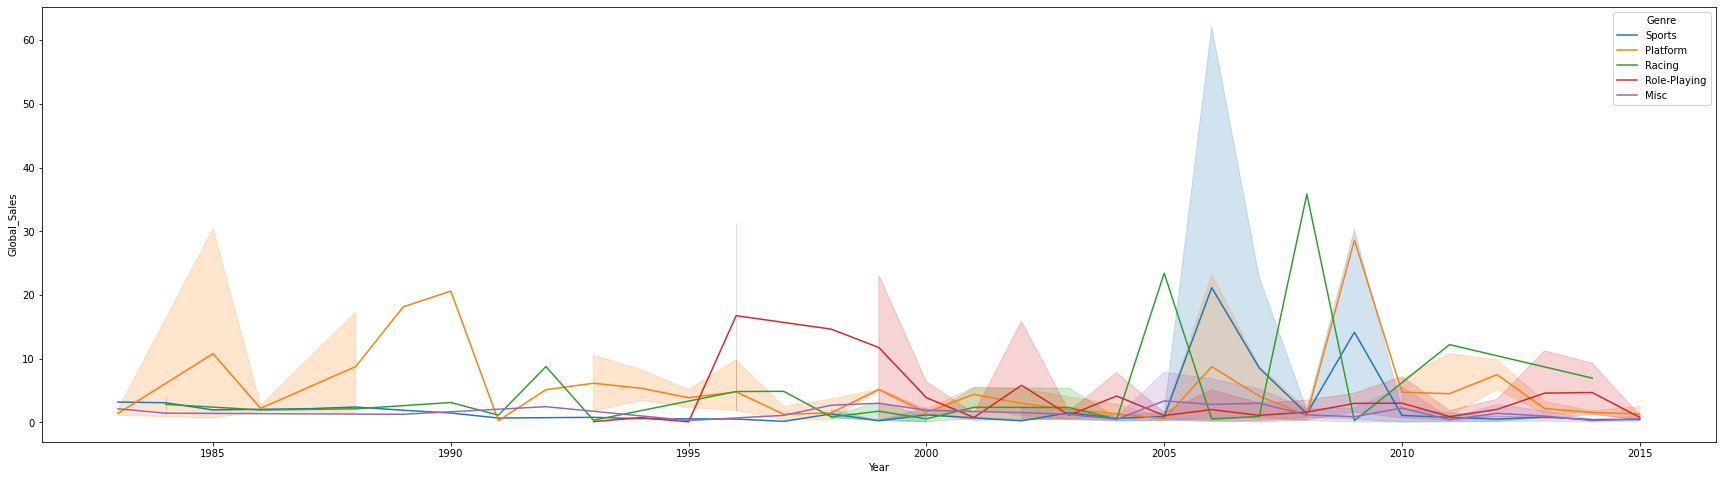

In [92]:
# Визуализация динамики продаж топ-5 жанров в мире
plt.figure(figsize=(30, 8))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = nintendo_top5)

# Наибольший скачок мировых продаж приходится на жанр Sports с 2005 по 2010 года.